# Inspection

In [1]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

In [2]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from utils import load_and_prepare_data, evaluate_metrics, plot_roc_curve, optimize_threshold

In [3]:
df = pd.read_parquet("../diabetes_dataset_prepared.parquet")
X_train, X_test, y_train, y_test = load_and_prepare_data(df)

In [4]:
cat = joblib.load('../models/cat_1.joblib')

In [5]:
y_train_pred = cat.predict(X_train[:, [4, 6]])
y_train_proba = cat.predict_proba(X_train[:, [4, 6]])[:, 1]
y_test_pred = cat.predict(X_test[:, [4, 6]])
y_test_proba = cat.predict_proba(X_test[:, [4, 6]])[:, 1]

In [6]:
results = pd.DataFrame(X_test[:, [4, 6]], columns=df.columns[[4, 6]])

results['y_true'] = y_test.values
results['y_test_pred'] = y_test_pred
results['y_test_proba'] = y_test_proba

results.head()

,glucose_fasting,hba1c,y_true,y_test_pred,y_test_proba
0,-1.917232,-1.363555,0,0,0.151909
1,0.796314,1.469269,1,1,0.999959
2,-0.450450,-0.505123,0,0,0.163988
3,0.722975,-0.186277,0,0,0.200728
4,-1.917232,-1.437134,1,0,0.153913


In [7]:
false_negatives = results[(results['y_true'] == 1) & (results['y_test_pred'] == 0)]
false_negatives.describe()

,glucose_fasting,hba1c,y_true,y_test_pred,y_test_proba
count,1596.000000,1596.000000,1596.0,1596.0,1596.000000
mean,-0.531234,-0.785189,1.0,0.0,0.166871
std,0.755357,0.570312,0.0,0.0,0.022751
min,-3.384014,-3.092680,1.0,0.0,0.079091
25%,-1.037163,-1.106025,1.0,0.0,0.149370
50%,-0.523790,-0.652283,1.0,0.0,0.160206
75%,-0.010416,-0.345700,1.0,0.0,0.183301
max,1.016331,-0.039118,1.0,0.0,0.327646


In [8]:
true_positives = results[(results['y_true'] == 1) & (results['y_test_pred'] == 1)]
true_positives.describe()

,glucose_fasting,hba1c,y_true,y_test_pred,y_test_proba
count,10327.000000,10327.000000,10327.0,10327.0,10327.000000
mean,0.547854,0.751769,1.0,1.0,0.999571
std,0.835911,0.626982,0.0,0.0,0.002564
min,-2.503945,-1.792770,1.0,1.0,0.948670
25%,-0.010416,0.267465,1.0,1.0,0.999913
50%,0.502958,0.635364,1.0,1.0,0.999952
75%,1.089670,1.113633,1.0,1.0,0.999960
max,3.949894,3.688927,1.0,1.0,0.999968


In [9]:
true_negatives = results[(results['y_true'] == 0) & (results['y_test_pred'] == 0)]
true_negatives.describe()

,glucose_fasting,hba1c,y_true,y_test_pred,y_test_proba
count,8077.000000,8077.000000,8077.0,8077.0,8077.000000
mean,-0.618113,-0.823069,0.0,0.0,0.164746
std,0.759366,0.584249,0.0,0.0,0.020822
min,-3.530692,-3.092680,0.0,0.0,0.066352
25%,-1.110502,-1.167341,0.0,0.0,0.148869
50%,-0.597129,-0.701336,0.0,0.0,0.157869
75%,-0.083755,-0.357963,0.0,0.0,0.181917
max,1.016331,-0.039118,0.0,0.0,0.286300


In [10]:
train_results = pd.DataFrame(X_train[:, [4, 6]], columns=df.columns[[4, 6]])
train_results['y_train_true'] = y_train.values
train_results['y_train_pred'] = y_train_pred
train_results['y_train_proba'] = y_train_proba

train_results.head()

,glucose_fasting,hba1c,y_train_true,y_train_pred,y_train_proba
0,-0.523790,-0.296647,0,0,0.157033
1,-0.230433,-0.149487,0,0,0.180457
2,-1.257180,-0.308910,1,0,0.143640
3,-0.303772,-0.137224,0,0,0.175444
4,-0.817146,-1.093761,0,0,0.146034


In [11]:
train_true_positives = train_results[(train_results['y_train_true'] == 1) & (train_results['y_train_pred'] == 1)]
train_true_positives.describe()

,glucose_fasting,hba1c,y_train_true,y_train_pred,y_train_proba
count,41780.000000,41780.000000,41780.0,41780.0,41780.000000
mean,0.559593,0.758134,1.0,1.0,0.999598
std,0.840647,0.626559,0.0,0.0,0.002444
min,-2.650623,-1.817297,1.0,1.0,0.948670
25%,-0.010416,0.279728,1.0,1.0,0.999913
50%,0.576297,0.647628,1.0,1.0,0.999952
75%,1.089670,1.125897,1.0,1.0,0.999961
max,4.463268,4.020036,1.0,1.0,0.999968


In [12]:
train_true_negatives = train_results[(train_results['y_train_true'] == 0) & (train_results['y_train_pred'] == 0)]
train_true_negatives.describe()

,glucose_fasting,hba1c,y_train_true,y_train_pred,y_train_proba
count,31925.000000,31925.000000,31925.0,31925.0,31925.000000
mean,-0.627647,-0.834102,0.0,0.0,0.164515
std,0.776524,0.592559,0.0,0.0,0.020891
min,-3.750709,-3.092680,0.0,0.0,0.067776
25%,-1.110502,-1.191868,0.0,0.0,0.148813
50%,-0.597129,-0.713599,0.0,0.0,0.157984
75%,-0.083755,-0.357963,0.0,0.0,0.182106
max,1.016331,-0.039118,0.0,0.0,0.327646


In [13]:
train_false_negatives = train_results[(train_results['y_train_true'] == 1) & (train_results['y_train_pred'] == 0)]
train_false_negatives.describe()

,glucose_fasting,hba1c,y_train_true,y_train_pred,y_train_proba
count,6295.000000,6295.000000,6295.0,6295.0,6295.000000
mean,-0.530920,-0.801611,1.0,0.0,0.168235
std,0.776116,0.580336,0.0,0.0,0.021133
min,-3.677370,-3.092680,1.0,0.0,0.110604
25%,-1.037163,-1.148946,1.0,0.0,0.150276
50%,-0.450450,-0.676810,1.0,0.0,0.162356
75%,0.062923,-0.333437,1.0,0.0,0.184466
max,1.016331,-0.039118,1.0,0.0,0.327646


Clearly, these instances of false negatives cannot be remedied. They truly do resemble true negatives more than true positives.

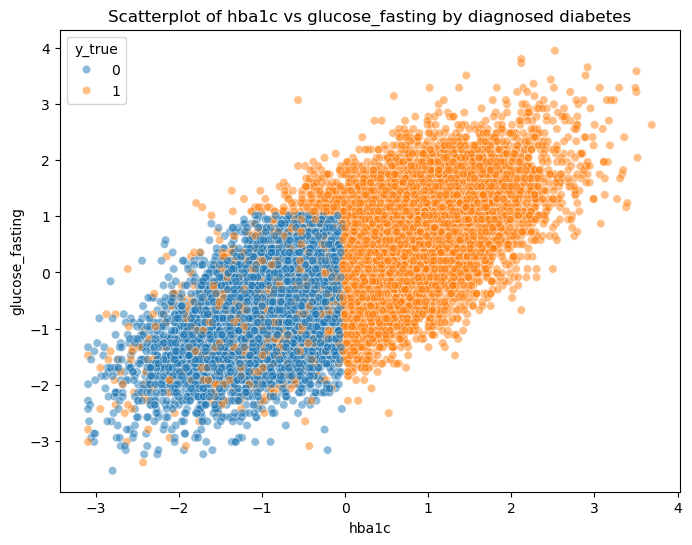

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=results, x='hba1c', y='glucose_fasting', hue='y_true', alpha=0.5)
plt.title("Scatterplot of hba1c vs glucose_fasting by diagnosed diabetes")
plt.show()

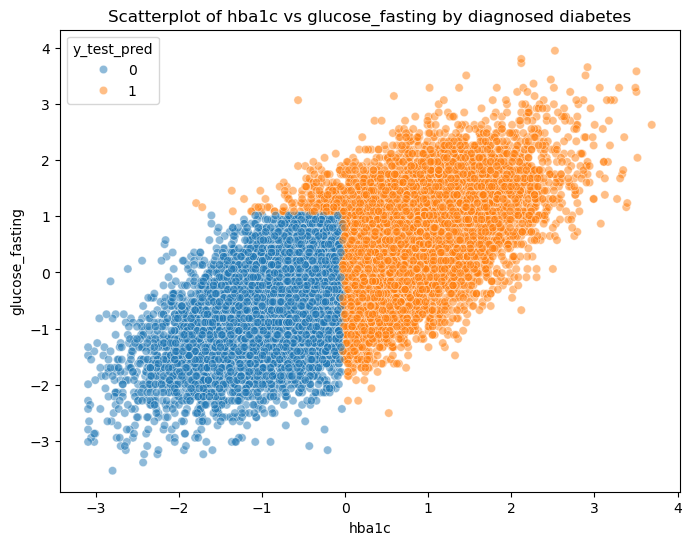

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=results, x='hba1c', y='glucose_fasting', hue='y_test_pred', alpha=0.5)
plt.title("Scatterplot of hba1c vs glucose_fasting by diagnosed diabetes")
plt.show()

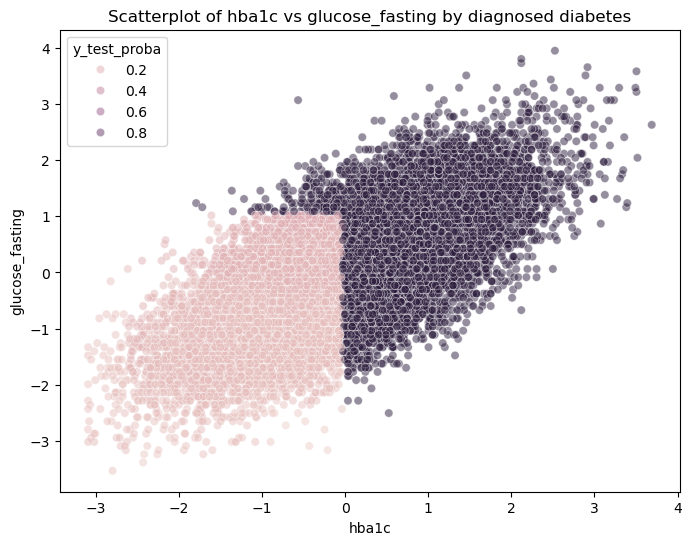

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=results, x='hba1c', y='glucose_fasting', hue='y_test_proba', alpha=0.5)
plt.title("Scatterplot of hba1c vs glucose_fasting by diagnosed diabetes")
plt.show()

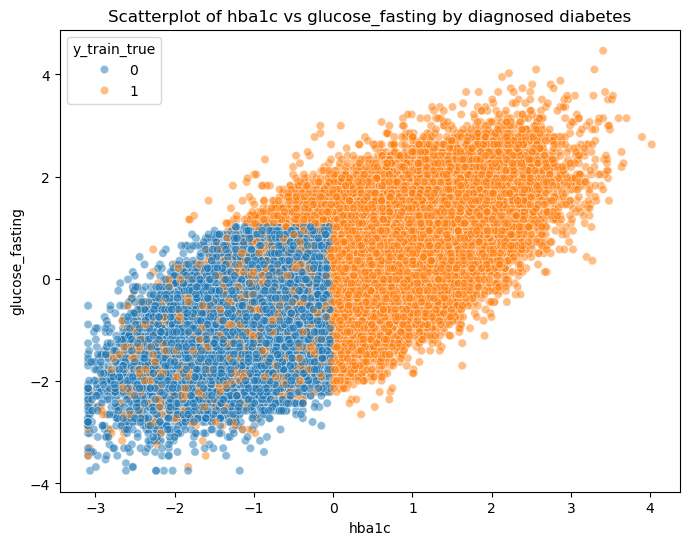

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_results, x='hba1c', y='glucose_fasting', hue='y_train_true', alpha=0.5)
plt.title("Scatterplot of hba1c vs glucose_fasting by diagnosed diabetes")
plt.show()

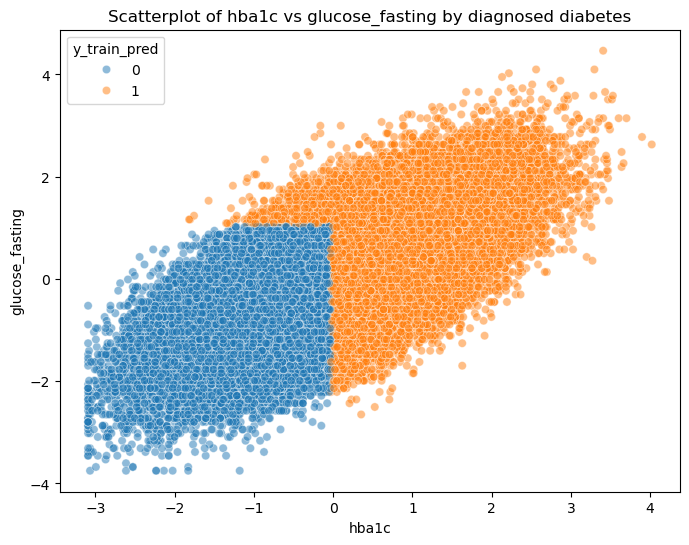

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_results, x='hba1c', y='glucose_fasting', hue='y_train_pred', alpha=0.5)
plt.title("Scatterplot of hba1c vs glucose_fasting by diagnosed diabetes")
plt.show()

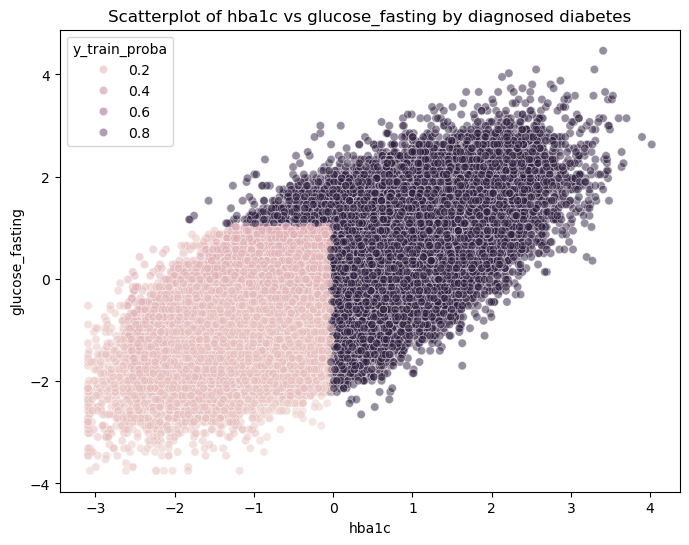

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_results, x='hba1c', y='glucose_fasting', hue='y_train_proba', alpha=0.5)
plt.title("Scatterplot of hba1c vs glucose_fasting by diagnosed diabetes")
plt.show()